# Customer segmentation

_Suppose we want to cluster our customers according to their buying behavior, e.g. their purchase frequency. The Kmeans function in scikit will enable us to do that.
_

In [2]:
import pandas as pd
import contiamo
import datetime

import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn import datasets

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Query data into Contiamo

In [3]:
transactions = %contiamo query query:sql:48590597:411:g71GXzJjsx4Uvad11ouKjoYbQUNNPy-qRMKkBNZfyx4
customers = %contiamo query query:sql:48590597:441:MG5W2dMjXzYgsHsgdQYzmhv44dxEQX2Lodu5Uh2Hx_s
applications = %contiamo query query:sql:48590597:442:-gz3nbw1fdmtSXkD4zGNA-cVa7s6sQtRn8upCSn6uys            

In [4]:
df = pd.DataFrame({
        'customer_id' : transactions['Field customer id'],
        'revenue' : pd.to_numeric(transactions['Field app price']),
        'n_of_purchases' : [1]*len(transactions)
    })
df.head()

,customer_id,n_of_purchases,revenue
0,2F65fA7Cd10cbFFD,1,4.99
1,2F65fA7Cd10cbFFD,1,0.19
2,2F65fA7Cd10cbFFD,1,0.99
3,44dEeeb9eEF3ff64,1,19.99
4,44dEeeb9eEF3ff64,1,14.99


# Clustering

In [5]:
pf = df.groupby('customer_id').agg({
        'revenue' : 'sum',
        'n_of_purchases' : 'sum'
    })
pf['average_transaction_price'] = pf['revenue'] / pf['n_of_purchases']

del pf['revenue']

pf.head()

,n_of_purchases,average_transaction_price
customer_id,,
000088f2dD0AC5B0,3,1.730000
00031218886cf4c3,3,0.260000
0003774A9BaEceB1,3,4.990000
000a27a08c360eD6,6,1.273333
000a7ac571aaC3e9,15,1.818667


In [6]:
%matplotlib inline
sns.set(style="ticks", color_codes=True)

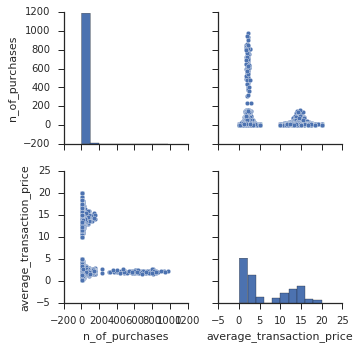

In [7]:
g = sns.pairplot(pf)

In [12]:
estimator = KMeans(n_clusters=4)

estimator.fit(pf)
labels = estimator.labels_
pf["labels"] = labels

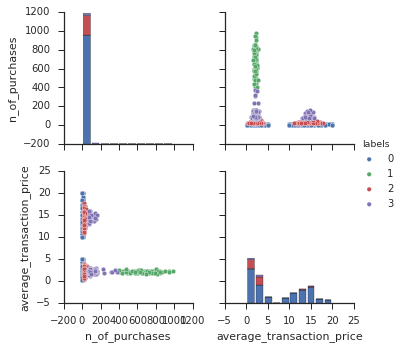

In [13]:
g = sns.pairplot(pf, vars=['n_of_purchases', 'average_transaction_price'], hue="labels")


We can see that 4 distinct groups have been created : One group of customer having a low purchase frequency and buying expensive apps (label 0), one group having a high purchase frequency and buying cheap apps (label 1), one group of customers having a low purchase frequency and buying cheap apps (label 2) and finally, one group of customer having an intermediate purchase frequency (label 4).  
A new column has been added in our data frame containing that information. So we could observe each group’s buying behavior even further by uploading the new data frame into Contiamo and exploring the data filtered by cluster in the Explore section. 
